In [43]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import streamlit as st

In [44]:

df = pdr.DataReader('TSLA', 'yahoo')
df.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-08-21,69.164001,66.370003,69.164001,67.571999,32477000.0,67.571999
2017-08-22,68.447998,67.473999,68.225998,68.269997,21610000.0,68.269997
2017-08-23,70.697998,67.660004,67.797997,70.554001,24772500.0,70.554001
2017-08-24,71.332001,69.947998,70.503998,70.585999,22923500.0,70.585999
2017-08-25,71.138000,69.459999,70.848000,69.610001,17420000.0,69.610001


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-08-12,900.479980,855.099976,868.250000,900.090027,26443300.0,900.090027
2022-08-15,939.400024,903.690002,905.359985,927.960022,29786400.0,927.960022
2022-08-16,944.000000,908.650024,935.000000,919.690002,29378800.0,919.690002
2022-08-17,928.969971,900.099976,910.190002,911.989990,22922000.0,911.989990
2022-08-18,919.500000,905.559998,918.000000,908.609985,15796700.0,908.609985


In [4]:
df = df.reset_index()


In [5]:
df = df.drop(['Date', 'High', 'Low', 'Open', 'Volume', 'Adj Close'], axis = 1)

In [6]:
df.head()

,Close
0,67.571999
1,68.269997
2,70.554001
3,70.585999
4,69.610001


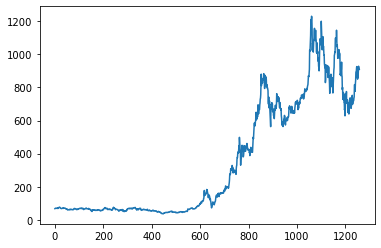

In [7]:
plt.plot(df.Close)

In [8]:
ma100 = df.Close.rolling(100).mean()
ma200 = df.Close.rolling(200).mean()

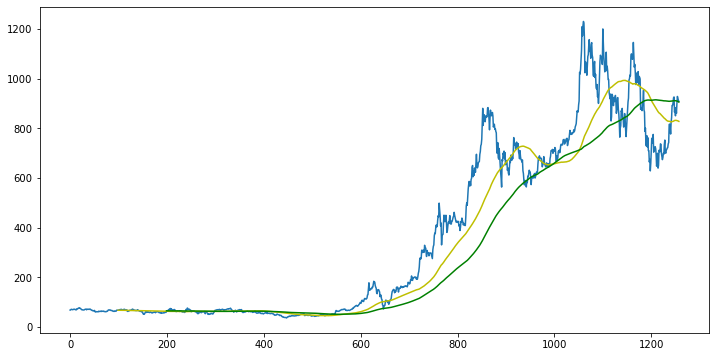

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'y')
plt.plot(ma200, 'g')

In [10]:
df.shape

(1258, 1)

In [11]:
#splitting data into trainig and testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

In [12]:
data_training.shape


(880, 1)

In [13]:
data_testing.shape

(378, 1)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [15]:
training_array = scaler.fit_transform(data_training)


In [16]:
x_train = []
y_train = []


for i in range(100, training_array.shape[0]):
    x_train.append(training_array[i-100:i])
    y_train.append(training_array[i,0])

x_train , y_train = np.array(x_train) , np.array(y_train)

In [17]:
#ML Model


In [18]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [19]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1) ))
model.add(Dropout(0.05))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.1))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.15))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [22]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
25/25 [==============================] - 12s 250ms/step - loss: 0.0031
Epoch 2/50
25/25 [==============================] - 8s 317ms/step - loss: 0.0029
Epoch 3/50
25/25 [==============================] - 7s 286ms/step - loss: 0.0023
Epoch 4/50
25/25 [==============================] - 8s 312ms/step - loss: 0.0017
Epoch 5/50
25/25 [==============================] - 7s 298ms/step - loss: 0.0031
Epoch 6/50
25/25 [==============================] - 8s 300ms/step - loss: 0.0022
Epoch 7/50
25/25 [==============================] - 8s 335ms/step - loss: 0.0019
Epoch 8/50
25/25 [==============================] - 9s 353ms/step - loss: 0.0023
Epoch 9/50
25/25 [==============================] - 9s 340ms/step - loss: 0.0020
Epoch 10/50
25/25 [==============================] - 8s 305ms/step - loss: 0.0020
Epoch 11/50
25/25 [==============================] - 8s 327ms/step - loss: 0.0019
Epoch 12/50
25/25 [==============================] - 8s 322ms/step - loss: 0.0016
Epoch 13/50
25/25 [=====

In [23]:
 model.save('kears_model2.h5')

In [24]:
past100data = data_training.tail(100)

In [25]:
final_df = past100data.append(data_testing, ignore_index = True)

In [26]:
input_data = scaler.fit_transform(final_df)
input_data.shape

(478, 1)

In [27]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]) :
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [28]:
x_test , y_test = np.array(x_test), np.array(y_test)

In [29]:
#ModelPredition
y_pred = model.predict(x_test)


12/12 [==============================] - 1s 59ms/step


In [30]:
scaler.scale_

array([0.00118783])

In [31]:
scale_factor = 1/scaler.scale_

In [32]:
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

<function matplotlib.pyplot.show(close=None, block=None)>

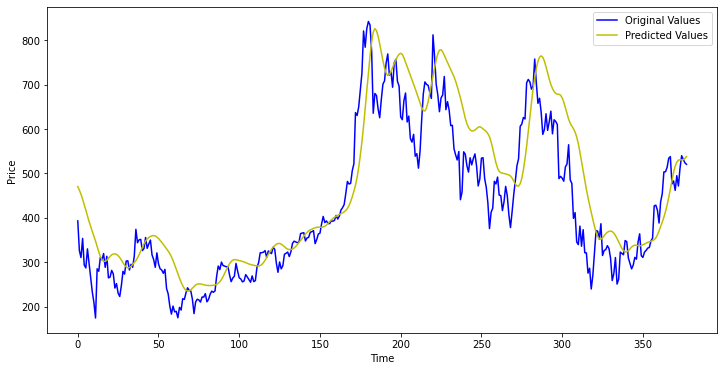

In [33]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label='Original Values')
plt.plot(y_pred, 'y', label='Predicted Values')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show

10